<h1><b>my first ML project</b></h1>


<b><H3>LOAD DATA</h3></b>

In [2]:
import pandas as pd 

df = pd.read_csv("https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv")

df.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04


<b><h3>DATA PREP INTO X AND Y(I/P AND O/P)</h3>
<h4>data splitting into train and test by 80:20</h4></b>

In [3]:
y = df['logS']
y.head()

0   -2.18
1   -2.00
2   -1.74
3   -1.48
4   -3.04
Name: logS, dtype: float64

In [7]:
X = df.drop('logS', axis=1)
X.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.5954,167.850,0.0,0.0
1,2.3765,133.405,0.0,0.0
2,2.5938,167.850,1.0,0.0
3,2.0289,133.405,1.0,0.0
4,2.9189,187.375,1.0,0.0


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


In [11]:
X_train 
# 80% of data for training

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5.0,0.000000
378,-2.07850,142.070,0.0,0.000000
529,-0.47730,168.152,0.0,0.000000
546,-0.86740,154.125,0.0,0.000000
320,1.62150,100.161,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


In [12]:
X_test
# 20% data for testing

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
822,2.91000,172.268,7.0,0.000000
118,7.27400,360.882,1.0,0.666667
347,1.94040,145.161,0.0,0.909091
1123,1.98640,119.378,0.0,0.000000
924,1.70062,108.140,0.0,0.750000
...,...,...,...,...
1114,1.76210,478.513,4.0,0.000000
427,6.32820,276.338,0.0,1.000000
711,0.04430,218.205,5.0,0.000000
4,2.91890,187.375,1.0,0.000000


In [18]:
print(f"y_train shape: {len(y_train)}")
print(f"y_test shape: {len(y_test)}")
print(f"y_lr_train_pred shape: {len(y_lr_train_pred)}")
print(f"y_lr_test_pred shape: {len(y_lr_test_pred)}")


y_train shape: 915
y_test shape: 229
y_lr_train_pred shape: 915
y_lr_test_pred shape: 229


<b><h3>MODEL BUILDING</h3></B>

<B><h2>LINEAR REGRESSION MODEL</h2></b>

training the model


In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

applying the model to make a prediction

In [15]:
y_lr_train_pred = lr.predict(X_train) #the 80% of the data
y_lr_test_pred = lr.predict(X_test) #the 20% of the data


evaluate model performance

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)



In [22]:
lr_train_mse

1.0075362951093687

In [23]:
lr_train_mse

1.0075362951093687

In [24]:
lr_train_r2

0.7645051774663391

In [25]:
lr_test_r2

0.7891616188563282

In [26]:

print(f"Train MSE: {lr_train_mse}, Train R2: {lr_train_r2}")
print(f"Test MSE: {lr_test_mse}, Test R2: {lr_test_r2}")

Train MSE: 1.0075362951093687, Train R2: 0.7645051774663391
Test MSE: 1.0206953660861033, Test R2: 0.7891616188563282


In [27]:
lr_results = pd.DataFrame(['linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()


In [28]:
lr_results

,0,1,2,3,4
0,linear regression,1.007536,0.764505,1.020695,0.789162


In [29]:
lr_results.columns = ['Method', 'training mse', 'training r2', 'test mse', 'test r2']
lr_results

,Method,training mse,training r2,test mse,test r2
0,linear regression,1.007536,0.764505,1.020695,0.789162


<h2><B>RANDOM FOREST MODEL</B></h2>

training the model

In [31]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=2, random_state=100)

applying the model to make a prediction

In [32]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)



evaluate model performance

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)


In [43]:
rf_results = pd.DataFrame(['random forest', rf_train_mse,rf_train_r2,rf_test_mse, rf_train_r2]).transpose()
rf_results

,0,1,2,3,4
0,random forest,1.028228,0.759669,1.407688,0.759669


In [56]:
rf_results.columns = ['Method','training mse', 'training r2', 'test mse', 'test r2']
rf_results

,Method,training mse,training r2,test mse,test r2
0,random forest,1.028228,0.759669,1.407688,0.759669


<h3><b>Model Comparision</b></h3>

In [57]:
df_models = pd.concat([lr_results, rf_results], axis=0)

df_models

,Method,training mse,training r2,test mse,test r2
0,linear regression,1.007536,0.764505,1.020695,0.789162
0,random forest,1.028228,0.759669,1.407688,0.759669


In [58]:
df_models.reset_index(drop=True)

,Method,training mse,training r2,test mse,test r2
0,linear regression,1.007536,0.764505,1.020695,0.789162
1,random forest,1.028228,0.759669,1.407688,0.759669


<h3><b>DATA VISUALIZATION OF PREDICTION RESULTS</b></h3>

using matplotlib

Text(0, 0.5, 'predicted logS')

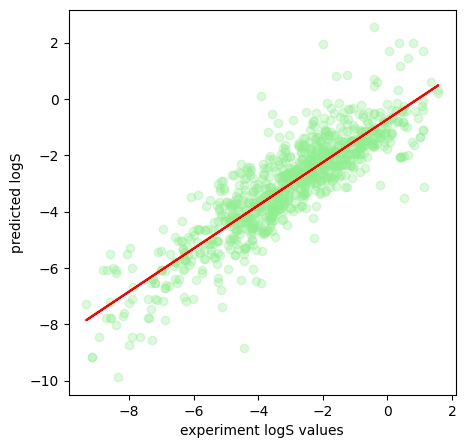

In [88]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c="lightgreen",alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), c="red")
plt.xlabel('experiment logS values')
plt.ylabel('predicted logS')